<a href="https://colab.research.google.com/github/shivani-202/Biomedical-Document-Classification/blob/main/dataset04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/medical_tc_test.csv')
df.head()

,condition_label,medical_abstract
0,3,Obstructive sleep apnea following topical orop...
1,5,Neutrophil function and pyogenic infections in...
2,5,A phase II study of combined methotrexate and ...
3,1,Flow cytometric DNA analysis of parathyroid tu...
4,4,Paraneoplastic vasculitic neuropathy: a treata...


In [ ]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   condition_label   2888 non-null   int64 
 1   medical_abstract  2888 non-null   object
dtypes: int64(1), object(1)
memory usage: 45.2+ KB


(None,
        condition_label
 count      2888.000000
 mean          3.334834
 std           1.552813
 min           1.000000
 25%           2.000000
 50%           4.000000
 75%           5.000000
 max           5.000000)



*   shape - (2888, 2)



In [ ]:
#check duplicate values, null and missing values
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].mean(), inplace=True)
# Impute missing values in non-numeric columns with an empty string
df.fillna('', inplace=True)

<ipython-input-4-2629458f870b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
#check for data adequacy
df.isnull().sum()

,0
condition_label,0
medical_abstract,0


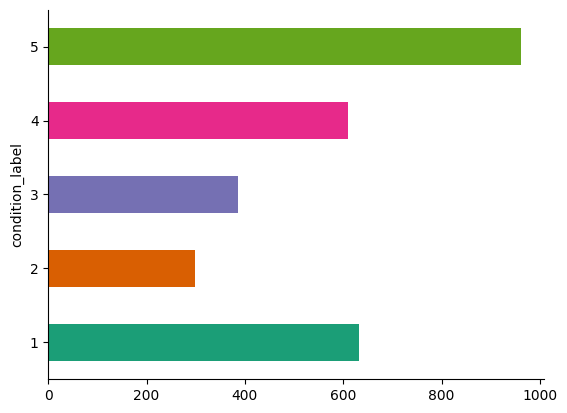

In [ ]:
#labels
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('condition_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['condition_label'].value_counts()

,count
condition_label,
5,961
1,633
4,610
3,385
2,299


The dataset involves 5 different classes.
Each class represents a medical condition as follows:


*   1 - neoplasms
*   2 - digestive system diseases
*   3 - nervous system diseases
*   4 - cardiovascular diseases
*   5 - general pathological condition





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


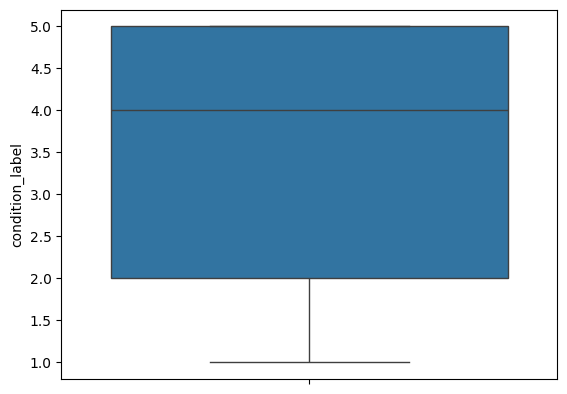

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(df['condition_label'])
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


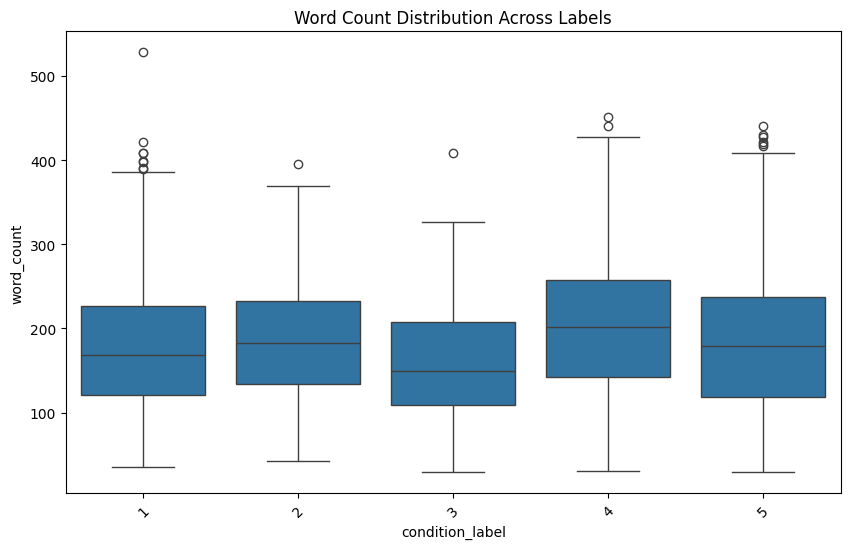

In [ ]:
df['word_count'] = df['medical_abstract'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition_label', y='word_count', data=df)
plt.title('Word Count Distribution Across Labels')
plt.xticks(rotation=45)
plt.show()

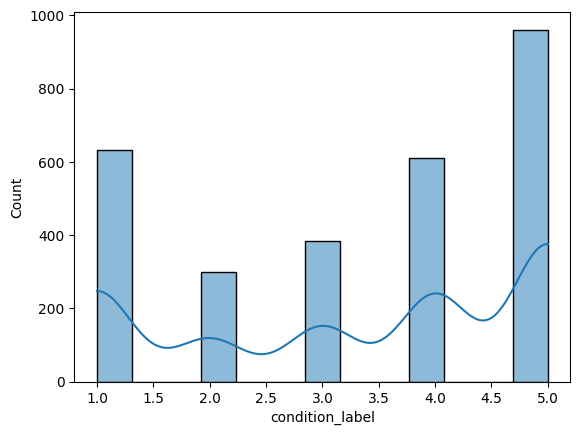

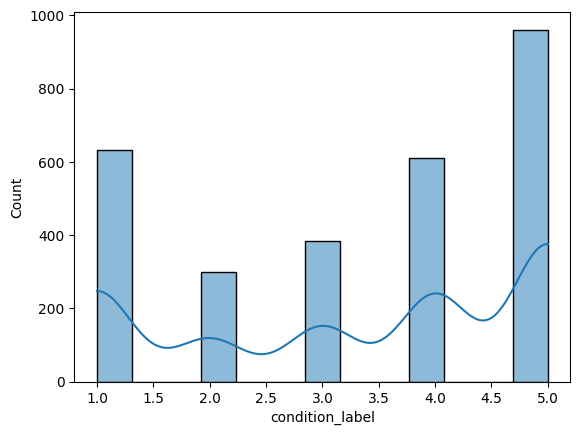

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(df['condition_label'], kde=True)
    plt.show()

In [ ]:
#descriptive statistics
df['word_count'] = df['medical_abstract'].apply(lambda x: len(str(x).split()))
print(df[['medical_abstract', 'word_count']].head())
print(df['word_count'].describe())

                                    medical_abstract  word_count
0  Obstructive sleep apnea following topical orop...         255
1  Neutrophil function and pyogenic infections in...         248
2  A phase II study of combined methotrexate and ...         268
3  Flow cytometric DNA analysis of parathyroid tu...         283
4  Paraneoplastic vasculitic neuropathy: a treata...          84
count    2888.000000
mean      181.122922
std        77.267352
min        29.000000
25%       123.000000
50%       179.000000
75%       236.250000
max       528.000000
Name: word_count, dtype: float64


In [ ]:
#identify outliers (documents with unusually high/low word count)

Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['word_count'] < Q1 - 1.5 * IQR) | (df['word_count'] > Q3 + 1.5 * IQR)]
print("Outliers:")
print(len(outliers))

Outliers:
20


Cleaned DataFrame:
   condition_label                                   medical_abstract  \
0                3  Obstructive sleep apnea following topical orop...   
1                5  Neutrophil function and pyogenic infections in...   
2                5  A phase II study of combined methotrexate and ...   
3                1  Flow cytometric DNA analysis of parathyroid tu...   
4                4  Paraneoplastic vasculitic neuropathy: a treata...   

   word_count  
0         255  
1         248  
2         268  
3         283  
4          84  


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


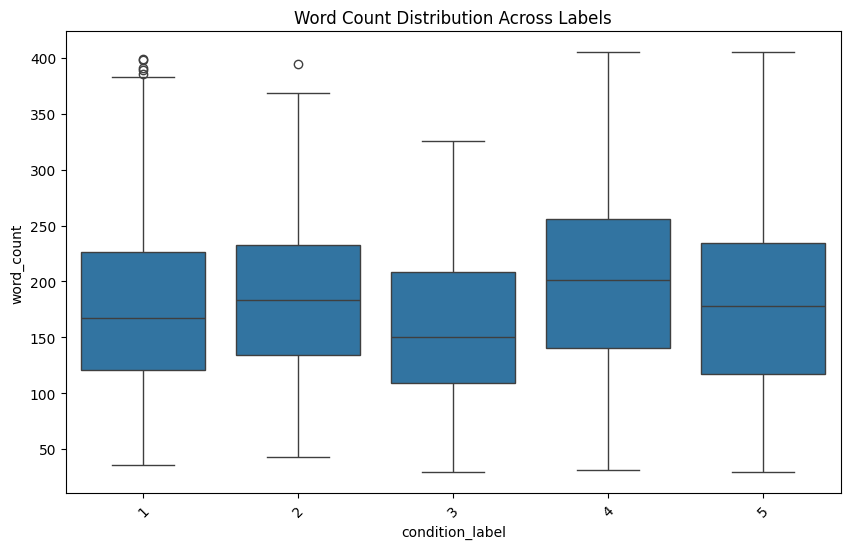

In [ ]:
#removing outliers
df_cleaned = df[(df['word_count'] >= Q1 - 1.5 * IQR) & (df['word_count'] <= Q3 + 1.5 * IQR)]
print("Cleaned DataFrame:")
print(df_cleaned.head())
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition_label', y='word_count', data=df_cleaned)
plt.title('Word Count Distribution Across Labels')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#check for null values again after cleaning
print(df_cleaned.isnull().sum())

condition_label     0
medical_abstract    0
word_count          0
dtype: int64


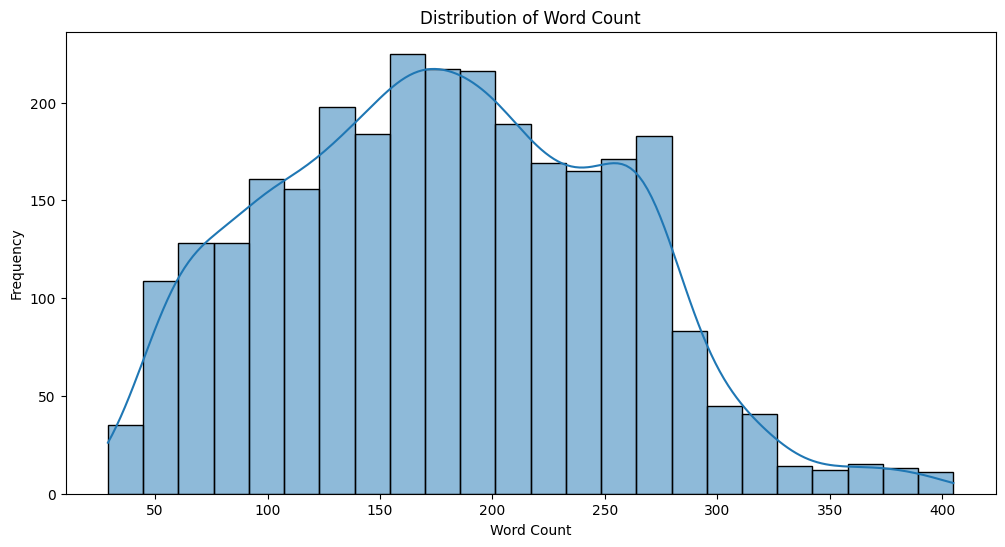

In [ ]:
#distribution pattern
plt.figure(figsize=(12,6))
sns.histplot(df_cleaned['word_count'], kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#sample mean of word count
sample_mean = df_cleaned['word_count'].mean()
print(f'Sample Mean:  {sample_mean}')

#sample standard deviation
sample_std = df_cleaned['word_count'].std()
print(f'Sample Standard Deviation:  {sample_std}')

#percentiles

p_25 = df_cleaned['word_count'].quantile(0.25)
p_75 = df_cleaned['word_count'].quantile(0.75)
print(f'25th Percentile: {p_25}')
print(f'75th Percentile: {p_75}')

#median and thrid quartile
median = df_cleaned['word_count'].median()
third_quartile = df_cleaned['word_count'].quantile(0.75)
print(f'Median: {median}')
print(f'Third Quartile:  {third_quartile}')

Sample Mean:  179.39993026499303
Sample Standard Deviation:  74.68961534034166
25th Percentile: 122.75
75th Percentile: 235.0
Median: 178.0
Third Quartile:  235.0


In [ ]:
#trimmed mean
from scipy.stats import trim_mean
data_cleaned = df_cleaned.copy()
trim_fraction = 0.1  # 10% of the data will be trimmed from both ends
trimmed_mean = trim_mean(data_cleaned['word_count'], proportiontocut=trim_fraction)
print(f'Trimmed Mean: {trimmed_mean}')

#trimmed median
trimmed_median = data_cleaned['word_count'].median()
print(f'Trimmed Median: {trimmed_median}')

#trimmed standard deviation
trimmed_std = data_cleaned['word_count'].std()
print(f'Trimmed Standard Deviation: {trimmed_std}')

Trimmed Mean: 178.17508710801394
Trimmed Median: 178.0
Trimmed Standard Deviation: 74.68961534034166


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


vectorizer = TfidfVectorizer(max_features=90)  # Convert text to 90 TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['medical_abstract'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())

         10     acute     after       age       all      also        an  \
0  0.071601  0.000000  0.000000  0.077254  0.062119  0.074692  0.096853   
1  0.131965  0.000000  0.205315  0.000000  0.114489  0.000000  0.000000   
2  0.255054  0.198262  0.132274  0.000000  0.073760  0.000000  0.057501   
3  0.000000  0.000000  0.000000  0.000000  0.119537  0.000000  0.046594   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

        and  are  artery  ...       two  ventricular       was        we  \
0  0.164639  0.0     0.0  ...  0.125008          0.0  0.253924  0.057595   
1  0.252865  0.0     0.0  ...  0.115198          0.0  0.100285  0.000000   
2  0.325816  0.0     0.0  ...  0.074216          0.0  0.129216  0.000000   
3  0.264013  0.0     0.0  ...  0.000000          0.0  0.104706  0.000000   
4  0.321466  0.0     0.0  ...  0.000000          0.0  0.106243  0.168686   

       were     which       who      with      year  years  
0  0.038694  0.000000  0.000000

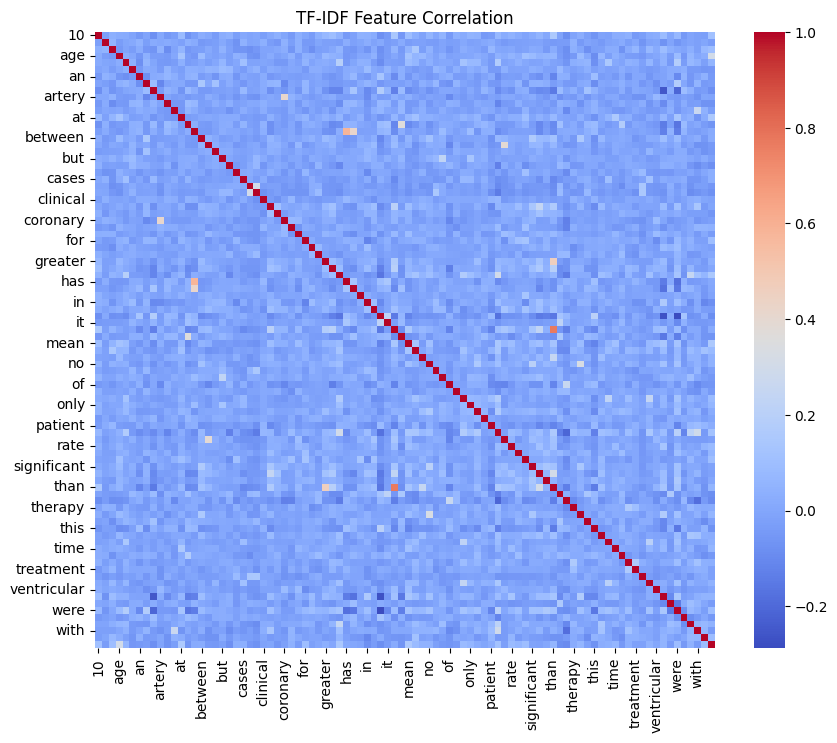

In [ ]:
# Calculate the correlation matrix for TF-IDF features
correlation_matrix = tfidf_df.corr()

# Plot a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('TF-IDF Feature Correlation')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score
)

X = df_cleaned['medical_abstract']
y = df_cleaned['condition_label']
# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to speed up computation
X_tfidf = tfidf.fit_transform(X)

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = {}

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
        else:
            y_prob = None  # No probability predictions available

        # Collect all evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Use ROC-AUC and Log-Loss only if probability predictions are available
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
        loss = log_loss(y_test, y_prob) if y_prob is not None else 'N/A'

        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        results[split] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc,
            'Confusion Matrix': cm,
            'Log-Loss': loss,
            'MCC': mcc,
            'Cohen\'s Kappa': kappa
        }

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True)
}

# Running experiments for all models
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


Running experiments for Logistic Regression...

Train-Test Split: 50.0-50.0
Accuracy: 0.5285913528591353
Precision: 0.5792403945786743
Recall: 0.44365712767825827
F1-Score: 0.4512435089208139
AUC-ROC: 0.8434819364771953
Confusion Matrix: [[212   3   3   0  83]
 [ 23  18   0   4 114]
 [ 13   0  30   6 142]
 [  7   1   7 168 116]
 [ 68  11  12  63 330]]
Log-Loss: 1.1751649946995166
MCC: 0.3682969706253094
Cohen's Kappa: 0.3502592236361016

Train-Test Split: 60.0-40.0
Accuracy: 0.5331010452961672
Precision: 0.5864732190087032
Recall: 0.45289735186316593
F1-Score: 0.4682463471282482
AUC-ROC: 0.847174464430718
Confusion Matrix: [[170   2   6   0  65]
 [ 14  15   1   2  92]
 [  7   0  34   6 106]
 [  1   1   7 133 103]
 [ 52   8  15  48 260]]
Log-Loss: 1.1501819849089205
MCC: 0.3763622098641568
Cohen's Kappa: 0.3588236152241463

Train-Test Split: 70.0-30.0
Accuracy: 0.5412311265969802
Precision: 0.5826762866624546
Recall: 0.4643854748847403
F1-Score: 0.4867046312069755
AUC-ROC: 0.84580620307

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Train-Test Split: 50.0-50.0
Accuracy: 0.50697350069735
Precision: 0.5080687990597239
Recall: 0.42393379341156123
F1-Score: 0.4152589236858281
AUC-ROC: 0.8035397345556072
Confusion Matrix: [[219   3   3   4  72]
 [ 24  11   1   3 120]
 [ 18   0  20  11 142]
 [  4   1   6 182 106]
 [ 82  11  16  80 295]]
Log-Loss: 1.1882343217483897
MCC: 0.3369768670566721
Cohen's Kappa: 0.32389570325082073

Train-Test Split: 60.0-40.0
Accuracy: 0.5104529616724739
Precision: 0.5015919425379918
Recall: 0.42813230663826485
F1-Score: 0.4197179003732031
AUC-ROC: 0.8145445340384085
Confusion Matrix: [[181   2   6   3  51]
 [ 14   9   1   5  95]
 [ 11   0  16  10 116]
 [  2   0   6 154  83]
 [ 61   9  16  71 226]]
Log-Loss: 1.1575289622552565
MCC: 0.3429282386079993
Cohen's Kappa: 0.33138503374289074

Train-Test Split: 70.0-30.0
Accuracy: 0.521486643437863
Precision: 0.5323113452472508
Recall: 0.4492915646802218
F1-Score: 0.4556482568808442
AUC-ROC: 0.8116383344582724
Confusion Matrix: [[135   4   1   1  44]
